In [11]:
# 使jupyter能够交互式显示图像
%matplotlib notebook

import json
import datetime

import pandas as pd
from numpy import array
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.figure as fig
   
from pyspark.sql import *

data=spark.read.parquet("file:///Users/ppx/Desktop/2018-05-25/vin=LEWTEB140JN100214")
data.first()

Row(obd_time='2018-05-16 18:26:38', charge_status='\\xE6\\x9C\\xAA\\xE5\\x85\\x85\\xE7\\x94\\xB5', voltage='592.9', current='5.8', battery_cell_voltage_highest_value='4.16', battery_cell_voltage_lowest_value='3.99', maximum_temperature_value='38', minimum_temperature_value='-40', highest_alert_level='\\xE6\\x97\\xA0\\xE6\\x95\\x85\\xE9\\x9A\\x9C', temperature_difference_alert='False', battery_high_temperature_alert='False', energy_storage_device_high_voltage_alert='False', energy_storage_device_low_voltage_alert='False', soc_low_alert='False', single_battery_high_voltage_alert='False', single_battery_low_voltage_alert='False', soc_too_high_alert='False', soc_jumping_alert='False', rechargeable_energy_storage_system_mismatch_alert='False', battery_cell_consistency_low_alert='False', insulation_alert='False', dc_dc_temperature_alert='False', braking_system_alert='False', dc_dc_status_alert='False', motor_controller_temperature_alert='False', hvil_alert='False', motor_temperature_alert='F

In [15]:
# 电池电压列表
import pandas
data1=data.select('obd_time','battery_cell_voltage_list').toPandas()
data1.head(20)

np.array(data1['battery_cell_voltage_list'])
data1.battery_cell_voltage_list

# data1.drop(0.0)

# for i in data1['battery_cell_voltage_list']:
#     for a in i:
#         if a==0.0:
#             a.drop(0.0)
#             print

#             print(i)

list2=[]
list1=[]
for n in data1['battery_cell_voltage_list']:
    list1.append(np.var(json.loads(n)).round(4))
#     list2.append(np.mean(json.loads(n)).round(4))


data1['battery_cell_voltage_list']=list1
# data1['mean']=list2
# list1
data1

# list对象保存
# data1.to_csv('/Users/ppx/Desktop/data1.txt', sep='\t', index=False)

,obd_time,battery_cell_voltage_list
0,2018-05-16 18:26:38,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
1,2018-05-16 18:26:39,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
2,2018-05-16 18:26:40,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
3,2018-05-16 18:26:41,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
4,2018-05-16 18:26:42,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
5,2018-05-16 18:26:43,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
6,2018-05-16 18:26:44,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
7,2018-05-16 18:26:45,"[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1..."
8,2018-05-17 16:22:27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,2018-05-17 16:22:28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


array(['[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.13, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.07, 4.12, 4.15, 4.05, 4.15, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.11, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.16, 4.04, 4.15, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.06, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12]',
       '[3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.12, 4.

0       [3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1...
1       [3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1...
2       [3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1...
3       [3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1...
4       [3.99, 4.15, 4.11, 4.12, 4.12, 4.12, 4.12, 4.1...
                              ...                        
1201    [3.78, 3.93, 3.89, 3.9, 3.9, 3.9, 3.9, 3.9, 3....
1202    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1203    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1204    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1205    [3.83, 3.9, 3.89, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9...
Name: battery_cell_voltage_list, Length: 1206, dtype: object

,obd_time,battery_cell_voltage_list
0,2018-05-16 18:26:38,0.0004
1,2018-05-16 18:26:39,0.0004
2,2018-05-16 18:26:40,0.0004
3,2018-05-16 18:26:41,0.0004
4,2018-05-16 18:26:42,0.0004
...,...,...
1201,2018-05-25 16:35:15,0.0003
1202,2018-05-25 16:39:02,0.0000
1203,2018-05-25 16:39:03,0.0000
1204,2018-05-25 16:39:04,0.0000


<IPython.core.display.Javascript object>


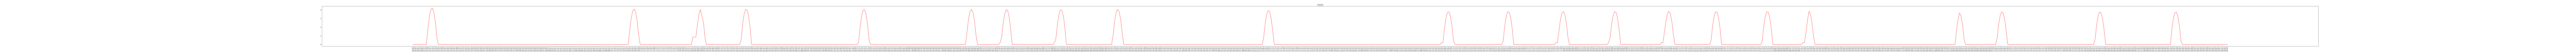

<IPython.core.display.Javascript object>


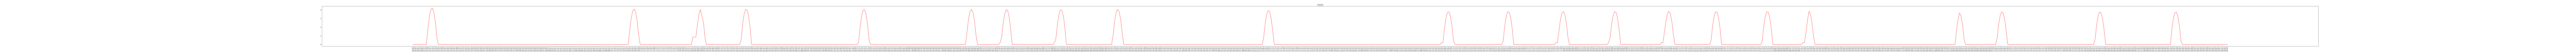

Text(0.5, 1.0, '电池组方差图')

([<matplotlib.axis.XTick at 0x1199e13c8>,
  ...],
 <a list of 1206 Text xticklabel objects>)

In [13]:
# 对两个变量做类型转换
data1['battery_cell_voltage_list']=data1['battery_cell_voltage_list'].astype('double')
data1['obd_time'] = pd.to_datetime(data1['obd_time'])

# 设置时间索引
data1.set_index('obd_time',inplace=True)

# 设置x.y坐标
_x = data1.index
_y = data1.values

# 绘制
plt.figure(figsize=(250,5),dpi=80)
plt.title('电池组方差图')
plt.plot(range(len(_x)),_y,color='r')
plt.xticks(range(len(_x)),_x,rotation=90)
plt.show()

In [9]:
# 子系统探测温度
import pandas
data2=data.select('obd_time','subsystem_probe_temperature_list').toPandas()
data2
type(data1)

list2=[]
list21=[]
for n in data2['subsystem_probe_temperature_list']:
    list2.append(np.var(json.loads(n)).round(4))
#     list21.append(np.mean(json.loads(n)).round(4))
    
data2['subsystem_probe_temperature_list']=list2
# data2['mea']=list21
data2

AnalysisException: "cannot resolve '`subsystem_probe_temperature_list`' given input columns: [battery_cell_voltage_highest_value, single_battery_high_voltage_alert, resd_subsystem_count, voltage, energy_storage_device_high_voltage_alert, minimum_temperature_value, vin, obd_time, motor_temperature_alert, energy_storage_device_low_voltage_alert, hvil_alert, battery_faults_count, single_battery_low_voltage_alert, current, braking_system_alert, battery_high_temperature_alert, resd_subsystem_temperature_list, battery_fault_codes, motor_controller_temperature_alert, rechargeable_energy_storage_system_mismatch_alert, dc_dc_temperature_alert, highest_alert_level, temperature_difference_alert, dc_dc_status_alert, soc_jumping_alert, insulation_alert, has_alert, soc_low_alert, resd_subsystem_voltage_list, soc_too_high_alert, maximum_temperature_value, energy_storage_device_over_charge_alert, battery_cell_consistency_low_alert, charge_status, battery_cell_voltage_lowest_value];;\n'Project [obd_time#110, 'subsystem_probe_temperature_list]\n+- Relation[battery_cell_consistency_low_alert#88,battery_cell_voltage_highest_value#89,battery_cell_voltage_lowest_value#90,battery_fault_codes#91,battery_faults_count#92,battery_high_temperature_alert#93,braking_system_alert#94,charge_status#95,current#96,dc_dc_status_alert#97,dc_dc_temperature_alert#98,energy_storage_device_high_voltage_alert#99,energy_storage_device_low_voltage_alert#100,energy_storage_device_over_charge_alert#101,has_alert#102,highest_alert_level#103,hvil_alert#104,insulation_alert#105,maximum_temperature_value#106,minimum_temperature_value#107,motor_controller_temperature_alert#108,motor_temperature_alert#109,obd_time#110,rechargeable_energy_storage_system_mismatch_alert#111,... 11 more fields] json\n"

<IPython.core.display.Javascript object>


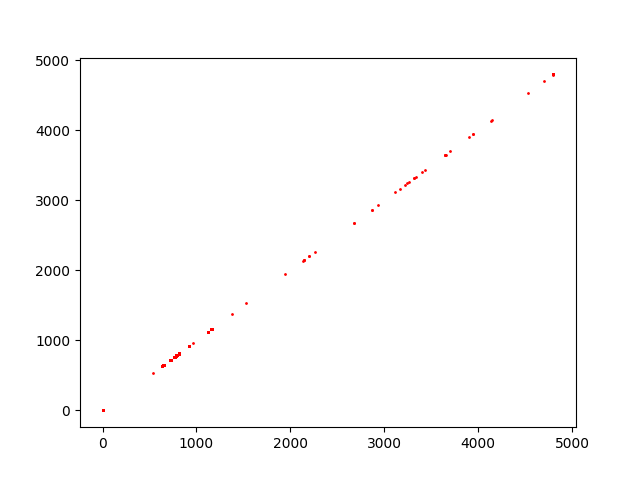

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 绘制方差散点图
data3=data2["subsystem_probe_temperature_list"]
data4=np.array(data3).reshape(-1,1)
fig,ax1=plt.subplots(1)
ax1.scatter(data4[:,0],data4[:,0],s=1,c="r",marker="o")
plt.show()

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

array([[3849.58295135],
       [ 804.90108965]])

95930564.74156617

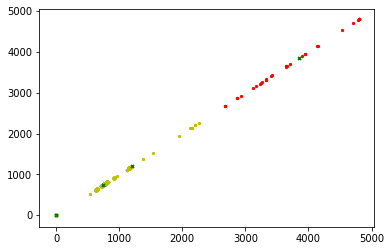

In [54]:
n_clusters=2
cluster=KMeans(n_clusters=n_clusters).fit(data4)
# 获取类标签
y_pre=cluster.labels_
y_pre

# 获取簇心
cc=cluster.cluster_centers_
cc

# 获取距离总和
cluster.inertia_

color=["r","y","b","g"]
fig,ax2=plt.subplots(1)

# 根据不同簇画图
for i in range(n_clusters):
    ax2.scatter(data4[y_pre==i,0],data4[y_pre==i,0],s=5,c=color[i])
    
# 画簇心
ax2.scatter(n_clu[:,0],n_clu[:,0],marker="x",s=10,c="g")
plt.show()

In [55]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
silhouette_score(data4,y_pre)

0.9107271177720281

<Figure size 1600x480 with 0 Axes>

Text(0.5, 1.0, '子系统探针温度方差变化图')

([<matplotlib.axis.XTick at 0x12c1b0fd0>,
  ...],
 <a list of 1206 Text xticklabel objects>)

/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ppx/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28

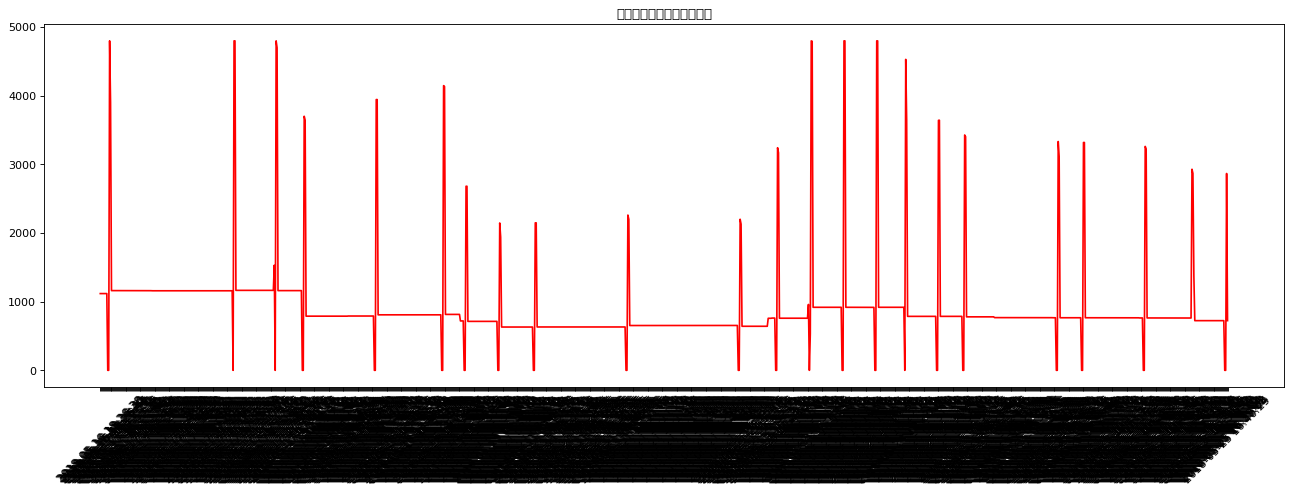

In [43]:
# 对两个变量做类型转换
data2['subsystem_probe_temperature_list']=data2['subsystem_probe_temperature_list'].astype('double')
data2['obd_time'] = pd.to_datetime(data2['obd_time'])

# 设置时间索引
data2.set_index('obd_time',inplace=True)

# 设置x.y坐标
_x = data2.index
_y = data2.values

# 绘制
plt.figure(figsize=(20,6),dpi=80)
plt.title('子系统探针温度方差变化图')
plt.plot(range(len(_x)),_y,color='r')
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()

In [2]:
%matplotlib notebook